# Trending Analysis via Stock Market Data

In this data project we will focus on exploratory data analysis of stock prices. We will be looking at data from the stock market, particularly Financial Services/Bank Holding Company stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history.

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?

We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016.

# Get the Data

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [25]:
from IPython.display import display, HTML, Markdown, display

#constants 
def printmd(string):
    display(Markdown(string))
alphaLev = .5

We will get stock information for the following tech companies from Jan 1st 2006 to Jan 1st 2017 for each of these tech companies:
 
Discover, CitiGroup, JPMorgan Chase, American Express, and Capital One

In [8]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [18]:
# CitiGroup
C = data.DataReader("C", 'google', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)

# American Express
AXP = data.DataReader("AXP", 'google', start, end)

# Capital One
COF = data.DataReader("COF", 'google', start, end)


Create a list of the ticker symbols (as strings).

In [19]:
tickers = ['C', 'JPM', 'AXP', 'COF']

Concatenate the bank dataframes together to a single data frame called fin_stocks. 

In [20]:
fin_stocks = pd.concat([C, JPM, AXP, COF],axis=1,keys=tickers)

Need to set the column name levels.

In [21]:
fin_stocks.columns.names = ['Bank Ticker','Stock Info']

Check head of dataframe

In [22]:
fin_stocks.head()

Bank Ticker      C                                  JPM                       \
Stock Info    Open   High    Low  Close   Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03   490.0  493.8  481.1  492.9  1537660  39.83  40.36  39.30  40.19   
2006-01-04   488.6  491.0  483.5  483.8  1871020  39.78  40.14  39.42  39.62   
2006-01-05   484.4  487.8  484.0  486.2  1143160  39.61  39.81  39.50  39.74   
2006-01-06   488.8  489.0  482.0  486.2  1370250  39.92  40.24  39.55  40.02   
2006-01-09   486.0  487.4  483.0  483.9  1680740  39.88  40.72  39.88  40.67   

Bank Ticker              AXP                                  COF         \
Stock Info     Volume   Open   High    Low  Close   Volume   Open   High   
Date                                                                       
2006-01-03   12839400  51.70  52.58  51.05  52.58  7825700  86.40  86.98   
2006-01-04   13491800  52.44  52.57  51.81  51.95  5729400  86.98  87.18   
2006-01-05    8109400  51.90  52.51  51.90  52.50  3926000  86.55  86.95   
2006-01-06    7966900  52.64  52.87  52.28  52.68  4137800  86.80  86.85   
2006-01-09   16575200  52.82  53.99  52.82  53.99  6093300  86.55  88.63   

Bank Ticker                         
Stock Info     Low  Close   Volume  
Date                                
2006-01-03   84.35  86.98  1934000  
2006-01-04   85.59  86.42  1751500  
2006-01-05   86.00  86.44  1365100  
2006-01-06   85.69  86.44   904000  
2006-01-09   86.54  88.12  1598400

In [16]:
import seaborn as sns

_Figure 1: No Missing Data Indicated._

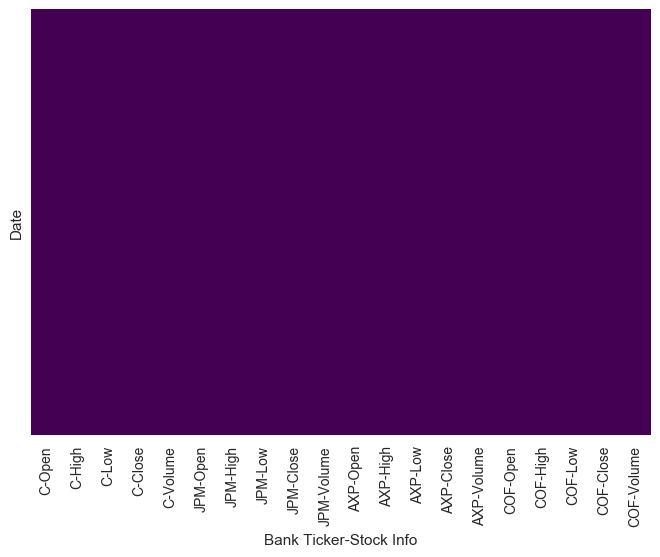

In [26]:
sns.heatmap(fin_stocks.isnull(), yticklabels=False, cbar=False, cmap='viridis')
printmd("_Figure 1: No Missing Data Indicated._")

# Stock Analysis 

Since Hierarchical/Mult-Level Indexing enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d), it identifies data (i.e. provides metadata) using known indicators.

What is the max,average and minimum close price for each bank's stock throughout the time period?


In [27]:
fin_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
C      564.10
JPM     87.13
AXP     95.84
COF     91.71
dtype: float64

In [29]:
fin_stocks.xs(key='Close',axis=1,level='Stock Info').mean()

Bank Ticker
C      136.364131
JPM     47.772546
AXP     57.095226
COF     59.753521
dtype: float64

In [30]:
fin_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
C       4.52
JPM    15.90
AXP    10.26
COF     8.31
dtype: float64

Create a column representing the return value from the Close column by creating a for loop. 

In [33]:
returns = pd.DataFrame()

In [34]:
for tick in tickers:
    returns[tick+' Return'] = fin_stocks[tick]['Close'].pct_change()
returns.head()

,C Return,JPM Return,AXP Return,COF Return
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,-0.018462,-0.014183,-0.011982,-0.006438
2006-01-05,0.004961,0.003029,0.010587,0.000231
2006-01-06,0.000000,0.007046,0.003429,0.000000
2006-01-09,-0.004731,0.016242,0.024867,0.019435


Using a pairplot, which stock stands out to you? 

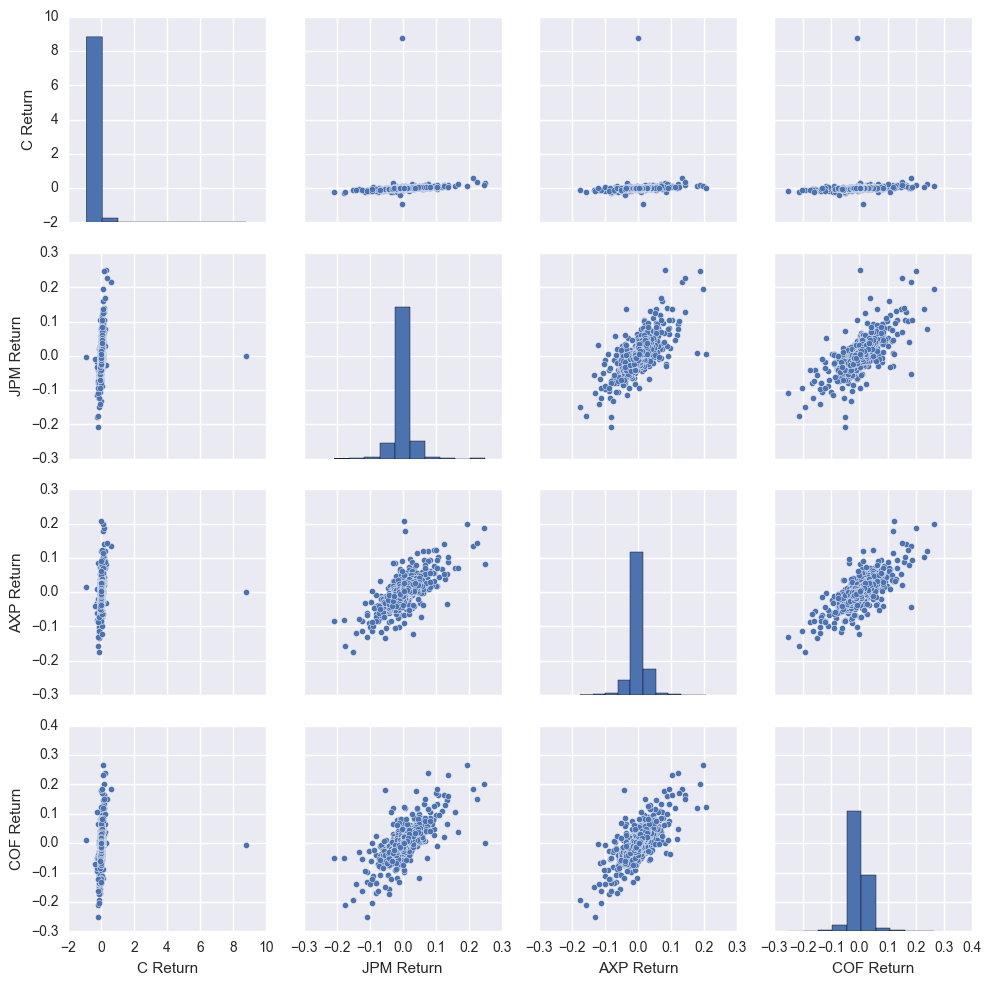

In [35]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Citigroup returns indicate a major crash, let's explore this a bit!

Since the index return the first occurrence of max and min over requested axis, let's explore what dates each bank holding stock had the best and worst single day returns.

In [37]:
returns.idxmin()

C Return     2011-05-06
JPM Return   2009-01-20
AXP Return   2008-09-29
COF Return   2009-04-20
dtype: datetime64[ns]

This link provides some insight into stock splitting. 
https://www.fool.com/investing/2017/01/10/citigroup-stock-split-will-the-bank-ever-split-its.aspx

In [38]:
returns.idxmax()

C Return     2011-05-09
JPM Return   2009-01-21
AXP Return   2009-04-24
COF Return   2009-04-09
dtype: datetime64[ns]

Show Close price and volume for holding stocks for the entire index of time.

In [46]:
sns.set_style('whitegrid')

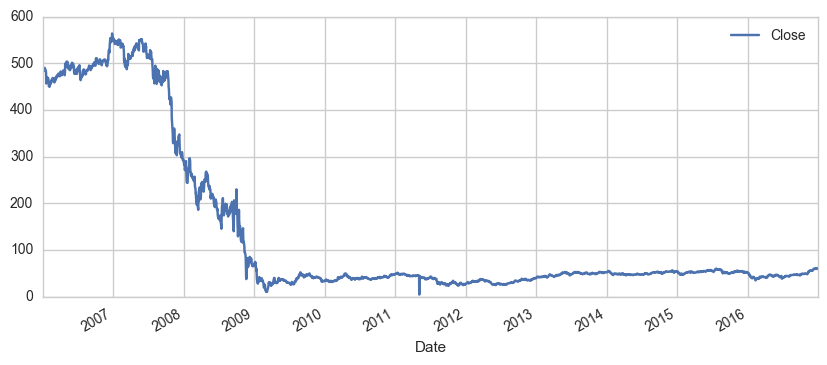

In [47]:
C['Close'].plot(legend=True,figsize=(10,4))

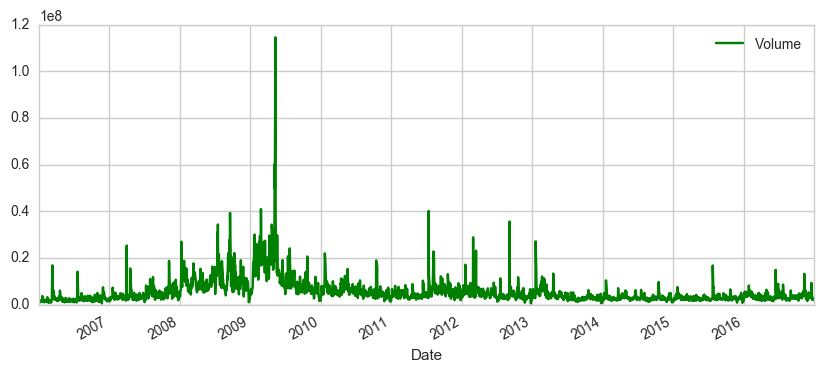

In [54]:
#Volume
COF['Volume'].plot(legend=True,figsize=(10,4),color='green')

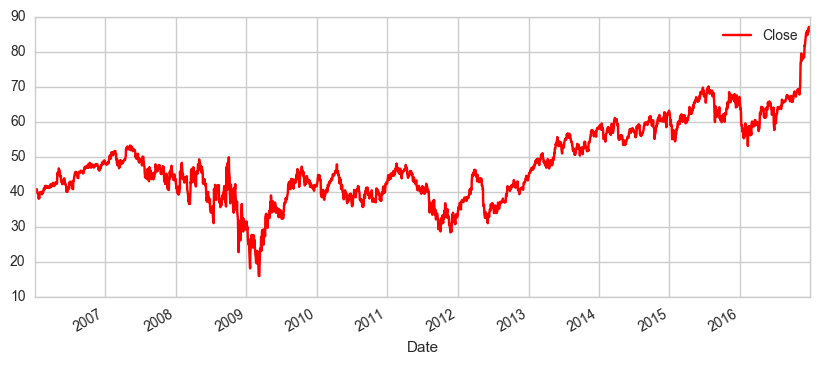

In [49]:
JPM['Close'].plot(legend=True,figsize=(10,4),color='red')

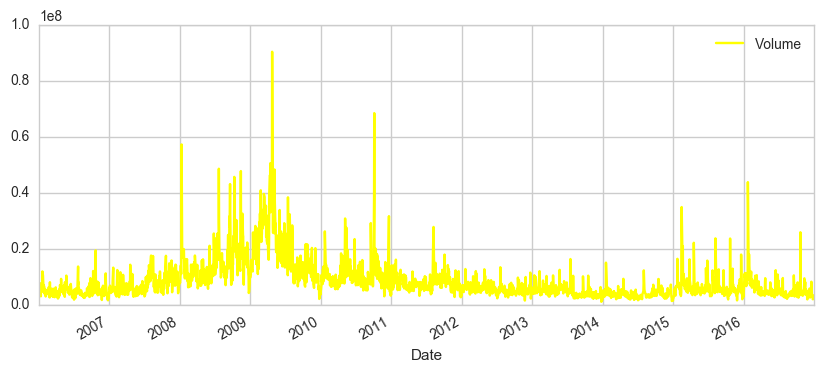

In [55]:
#Volume
AXP['Volume'].plot(legend=True,figsize=(10,4),color='yellow')

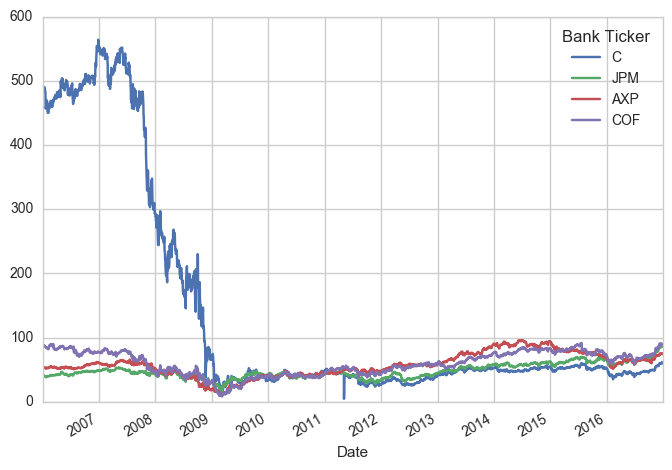

In [56]:
fin_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

Create a heatmap of the correlation between the stocks Close Price.

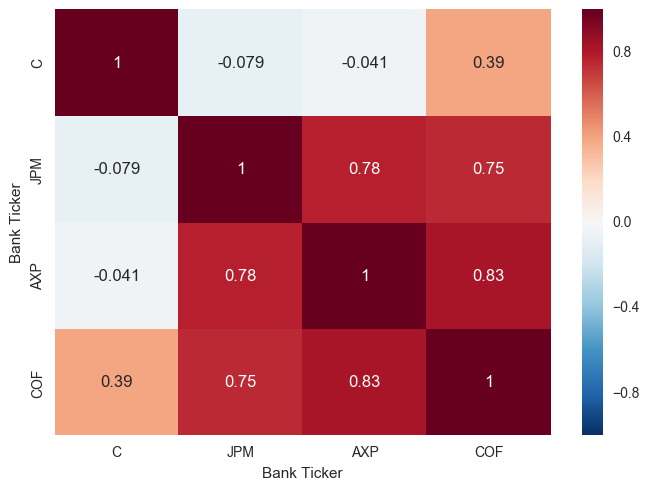

In [57]:
sns.heatmap(fin_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)